In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/FT1000_v1.csv')
df.head()

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Country1,Sector1
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016,Finland,Technology
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013,Lithuania,Health
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012,UK,Financial Services
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016,UK,Technology
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017,Germany,Energy


### 3.2.4. Quan hệ giữa cột `Sector` và `CAGR`

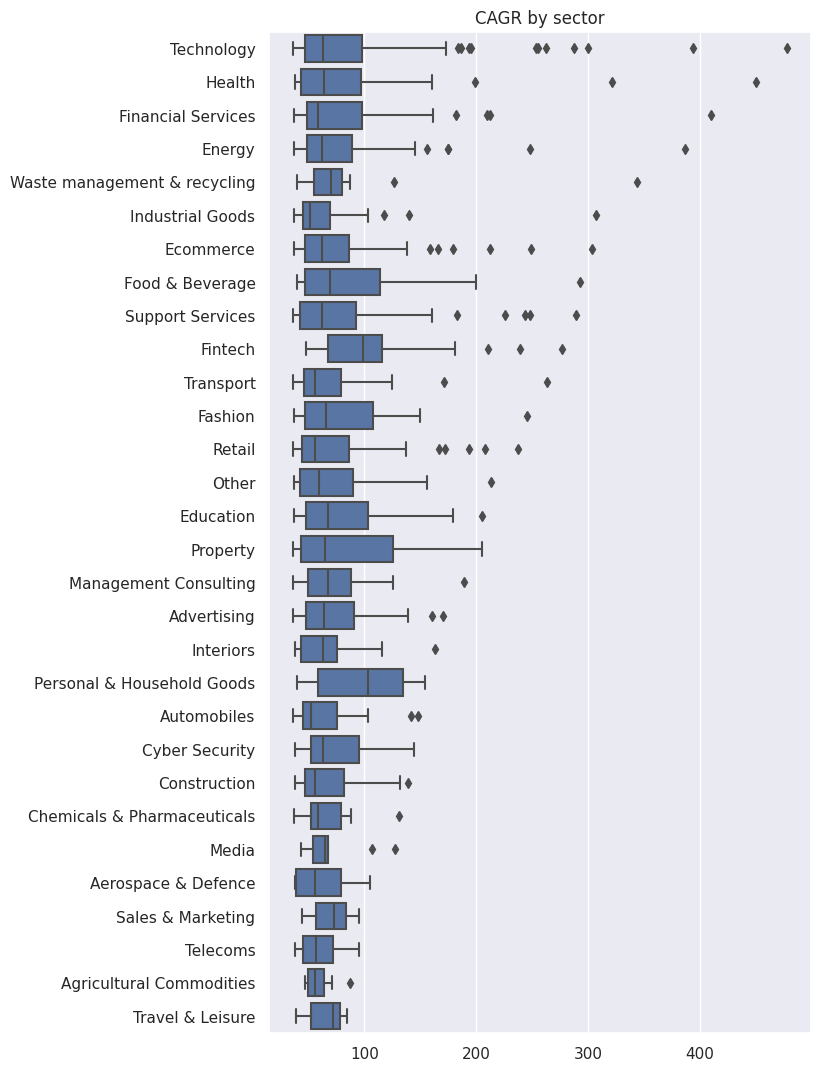

In [6]:
plt.figure(figsize = (7, 13))

ax = sns.boxplot(data = df, x = 'CAGR', y = 'Sector1', color = 'C0')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('CAGR by sector');

- Đa số khoảng tứ phân vị của các lĩnh vực nằm dưới mức 100%, mỗi số lĩnh vực trải rộng hơn như Property, Personal & Household Goods có khoảng tứ phân vị trải rộng hơn
- Đa số các lĩnh vực có phân bố dưới 200% CAGR, chỉ một nửa các lĩnh vực top đầu có các outliers vượt lên 200%, đặc biệt Technology có công ty đạt tới hơn 400% CAGR

### 3.2.5. Quan hệ giữa cột `Sector` và `Revenue`
Ở đây nhóm chỉ xét Revenue năm 2020

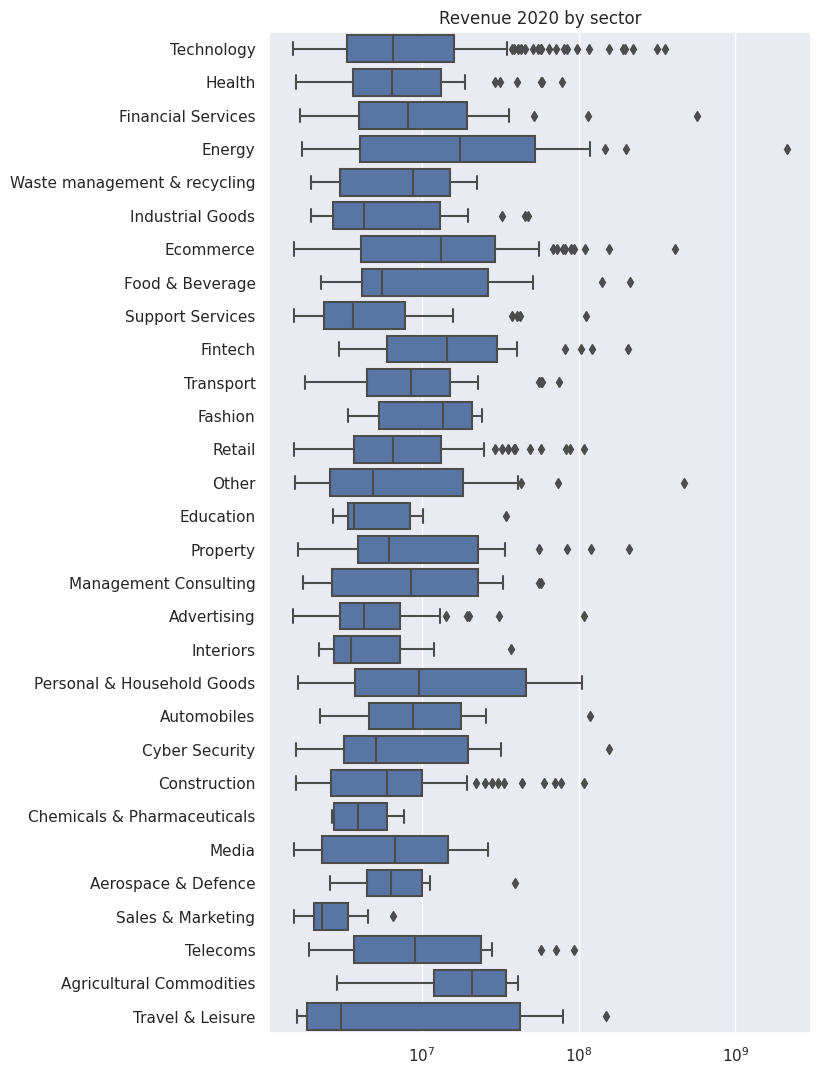

In [7]:
plt.figure(figsize = (7, 13))

ax = sns.boxplot(data = df, x = 'Revenue2020', y = 'Sector1', color = 'C0')

ax.set_xscale('log')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Revenue 2020 by sector');

Dù có sự biến động trong CAGR tối đa nhưng nhìn chung các công ty càng thành lập ở những năm về sau có mức CAGR trung binh càng cao hơn.

### 3.2.6. Quan hệ giữa cột `Revenue2020` và `Revenue2017`
Cho thấy mối quan hệ giữa doanh thu năm 2020 và 2017

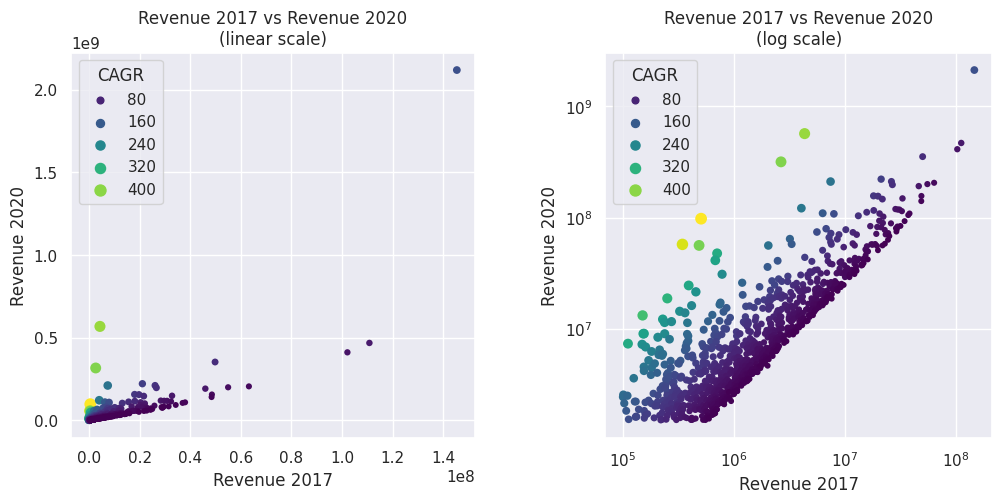

In [8]:
fig, axes = plt.subplots(ncols = 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.3)

sns.scatterplot(data = df, x = 'Revenue2017', y = 'Revenue2020', hue = 'CAGR', size = 'CAGR', edgecolor = 'None', palette = 'viridis', ax = axes[0])
axes[0].set_xlabel('Revenue 2017')
axes[0].set_ylabel('Revenue 2020')
axes[0].set_title('Revenue 2017 vs Revenue 2020\n(linear scale)')

sns.scatterplot(data = df, x = 'Revenue2017', y = 'Revenue2020', hue = 'CAGR', size = 'CAGR', edgecolor = 'None', palette = 'viridis', ax = axes[1])
axes[1].set_xlabel('Revenue 2017')
axes[1].set_ylabel('Revenue 2020')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_aspect('equal')
axes[1].set_title('Revenue 2017 vs Revenue 2020\n(log scale)');

### 3.2.7. Quan hệ giữa cột `Employees2020` và `Employees2017`
Cho thấy mối quan hệ giữa doanh thu năm 2020 và 2017

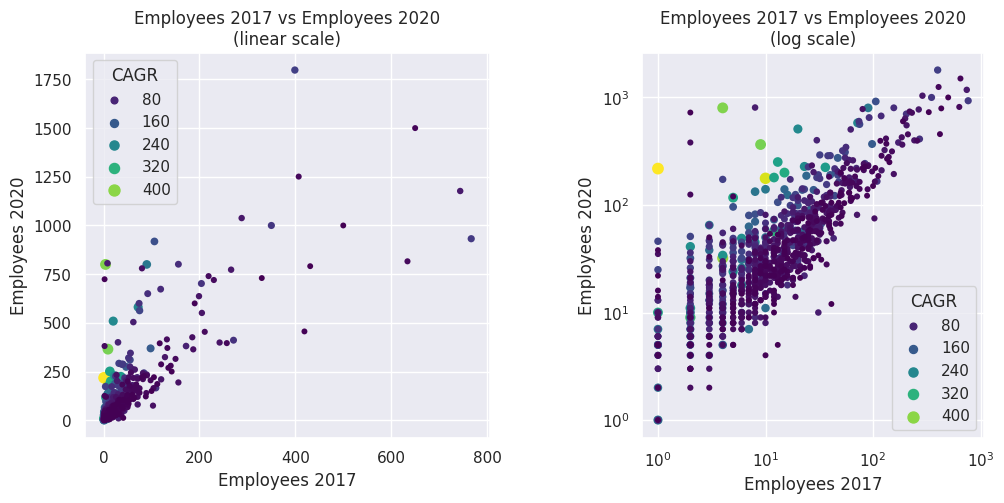

In [9]:
fig, axes = plt.subplots(ncols = 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.3)

sns.scatterplot(data = df, x = 'Employees2017', y = 'Employees2020', hue = 'CAGR', size = 'CAGR', edgecolor = 'None', palette = 'viridis', ax = axes[0])
axes[0].set_xlabel('Employees 2017')
axes[0].set_ylabel('Employees 2020')
axes[0].set_title('Employees 2017 vs Employees 2020\n(linear scale)')

sns.scatterplot(data = df, x = 'Employees2017', y = 'Employees2020', hue = 'CAGR', size = 'CAGR', edgecolor = 'None', palette = 'viridis', ax = axes[1])
axes[1].set_xlabel('Employees 2017')
axes[1].set_ylabel('Employees 2020')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_aspect('equal')
axes[1].set_title('Employees 2017 vs Employees 2020\n(log scale)');